In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
path = "../../data/"
train_data = pd.read_csv(path + 'train_events.csv')
all_data = pd.read_csv(path + 'all_events.csv')
video = pd.read_csv(path + 'video_info_v2.csv')
targets = pd.read_csv(path + 'train_targets.csv')

In [3]:
import os
import sys

original_cwd = os.getcwd()

module_dir = os.path.abspath('../../')
os.chdir(module_dir)
sys.path.append(module_dir)
from utils import Imputer
os.chdir(original_cwd)

In [39]:
all_events, _ = Imputer().transform(all_data, video,
                                    pd.DataFrame(index=all_data.viewer_uid.unique(), columns=['sex', 'age', 'age_class']))
train_events, targets = Imputer().transform(train_data, video, targets)
targets

,viewer_uid,age,sex,age_class
0,10087154,30,0,1
1,10908708,25,1,1
2,10190464,34,0,2
3,10939673,25,0,1
4,10288257,48,0,3
...,...,...,...,...
180007,10237402,43,1,3
180008,10796936,32,0,2
180009,10684284,28,0,1
180010,10031093,50,1,3


In [42]:
train_events = train_events.merge(targets, on='viewer_uid')
all_events[['sex', 'age', 'age_class']] = None
train_events.head()

,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,local_time,utc_delta,...,duration_sec,age_x,sex_x,age_class_x,age_y,sex_y,age_class_y,age,sex,age_class
0,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,133074,10067243,2024-06-01 08:40:58+00:00,5,...,2456,20,1,0,20,1,0,20,1,0
1,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,512,362960,10245341,2024-06-01 21:33:24+00:00,5,...,519,40,1,2,40,1,2,40,1,2
2,St.-Petersburg,desktop,browser,Windows,Chrome,5647,96775,10894333,2024-06-01 21:30:43+00:00,3,...,5518,23,0,1,23,0,1,23,0,1
3,Moscow,smartphone,mobile app,Android,Rutube,1521,161610,10029092,2024-06-01 23:03:42+00:00,3,...,1522,41,0,3,41,0,3,41,0,3
4,Moscow,smartphone,mobile app,Android,Rutube,71,116245,10452976,2024-06-01 22:48:09+00:00,3,...,1249,38,1,2,38,1,2,38,1,2


In [43]:
all_events = pd.concat([all_events, train_events], axis=0)
all_events

,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,local_time,utc_delta,...,duration_sec,sex,age,age_class,age_x,sex_x,age_class_x,age_y,sex_y,age_class_y
0,Tatarstan Republic,smartphone,browser,Android,Chrome Mobile,60,395879,10813370,2024-06-01 13:08:30+00:00,3,...,333,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
1,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,60,216518,10512324,2024-06-01 16:30:00+00:00,5,...,2500,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
2,Novosibirsk Oblast,smartphone,mobile app,Android,Rutube,121,41225,10951137,2024-06-01 22:48:12+00:00,7,...,257,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
3,Moscow,desktop,browser,Windows,Yandex Browser,2324,215886,10912434,2024-06-01 16:32:36+00:00,3,...,2363,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
4,Moscow Oblast,smartphone,mobile app,Android,Rutube,6830,43631,10223585,2024-06-01 00:57:04+00:00,3,...,3589,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759611,Moscow,smartphone,mobile app,Android,Rutube,4230,162776,10026914,2024-06-30 17:08:36+00:00,3,...,4480,1,32,2,32.0,1.0,2.0,32.0,1.0,2.0
1759612,Moscow,smartphone,browser,Android,Firefox Mobile,382,316157,10417567,2024-06-30 01:20:16+00:00,3,...,320,0,48,3,48.0,0.0,3.0,48.0,0.0,3.0
1759613,St.-Petersburg,desktop,browser,Windows,Microsoft Edge,1342,83304,10009094,2024-06-30 22:37:04+00:00,3,...,3125,0,28,1,28.0,0.0,1.0,28.0,0.0,1.0
1759614,St.-Petersburg,smartphone,mobile app,Android,Rutube,801,132769,10574374,2024-06-30 11:33:09+00:00,3,...,2401,1,43,3,43.0,1.0,3.0,43.0,1.0,3.0


In [44]:
author_popularity = all_events.groupby('author_id')['viewer_uid'].nunique()
author_popularity.name = 'author_popularity'
all_events = all_events.merge(author_popularity, on='author_id')
all_events['author_popularity'].head()

0    19568
1    87113
2      176
3     1267
4    11793
Name: author_popularity, dtype: int64

In [45]:
authors_treshold = author_popularity.quantile(0.98)
print("Authors view treshold:", authors_treshold)
popular_authors = all_events.groupby('author_id').size().reset_index(name='views').sort_values(
    'views',ascending=False).query(f'views >= {authors_treshold}')
popular_authors

Authors view treshold: 46.0


,author_id,views
6253,1009257,1551922
6224,1009219,1278748
31248,1043618,470136
5917,1008828,274698
6858,1010000,237737
...,...,...
18528,1026327,46
5445,1008127,46
15193,1021307,46
48313,1064020,46


In [46]:
active_users = all_events[all_events.author_id.isin(popular_authors.author_id)].groupby(
    'viewer_uid').size().reset_index().rename(columns={0: 'count'})
active_users.shape

(1099747, 2)

In [47]:
print(f"Active users: {active_users.shape[0] / all_events.viewer_uid.nunique():.4f} percent")

Active users: 0.9639 percent


In [48]:
all_events['score'] = all_events['total_watchtime'] / all_events['duration_sec'] + 0.1

In [49]:
import numpy as np
import scipy.sparse as sparse
from implicit.als import AlternatingLeastSquares
import warnings
warnings.filterwarnings('ignore')

# Train ALS 

# Encode the users and videos
# all_plus_train['uid'] = all_plus_train['viewer_uid'].astype("category").cat.codes
# all_plus_train['vid'] = all_plus_train['video_id'].astype("category").cat.codes
# all_plus_train['aid'] = all_plus_train['author_id'].astype("category").cat.codes

# Convert the data into a sparse matrix
als_data = all_events.loc[
    all_events.viewer_uid.isin(active_users.viewer_uid) & all_events.author_id.isin(popular_authors.author_id), :
]
als_data.loc[:, 'uid'] = als_data['viewer_uid'].astype("category").cat.codes
als_data.loc[:, 'aid'] = als_data['author_id'].astype("category").cat.codes

als_table = als_data.groupby(['uid', 'aid'])['score'].sum().reset_index()
ratings_matrix = sparse.coo_matrix((als_table['score'], (als_table['uid'], als_table['aid'])))
print(ratings_matrix.shape)

model = AlternatingLeastSquares(factors=64, regularization=0.1, iterations=30, calculate_training_loss=True)
ratings_matrix_csr = ratings_matrix.tocsr()
model.fit(ratings_matrix_csr, show_progress=True)


(1099747, 2537)


  0%|          | 0/30 [00:00<?, ?it/s]

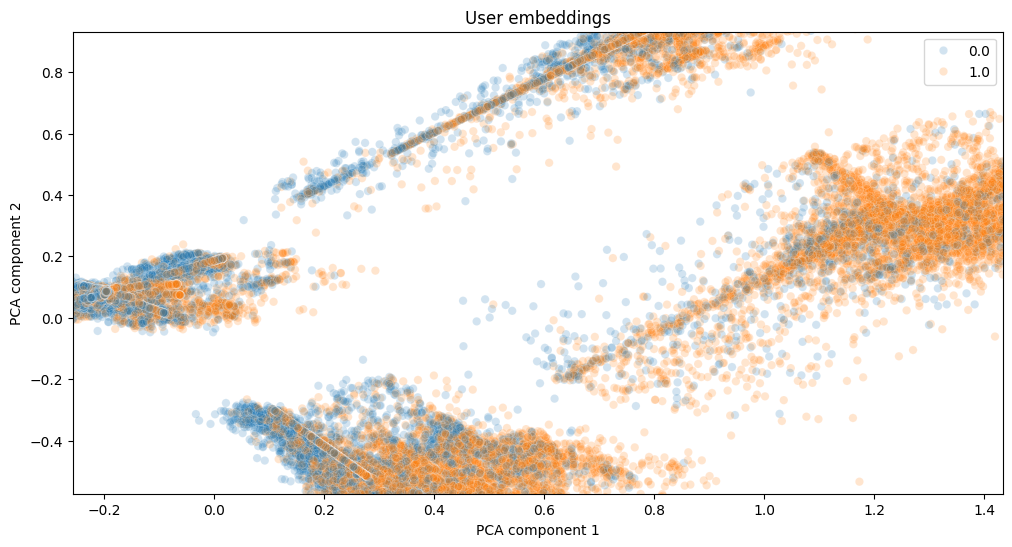

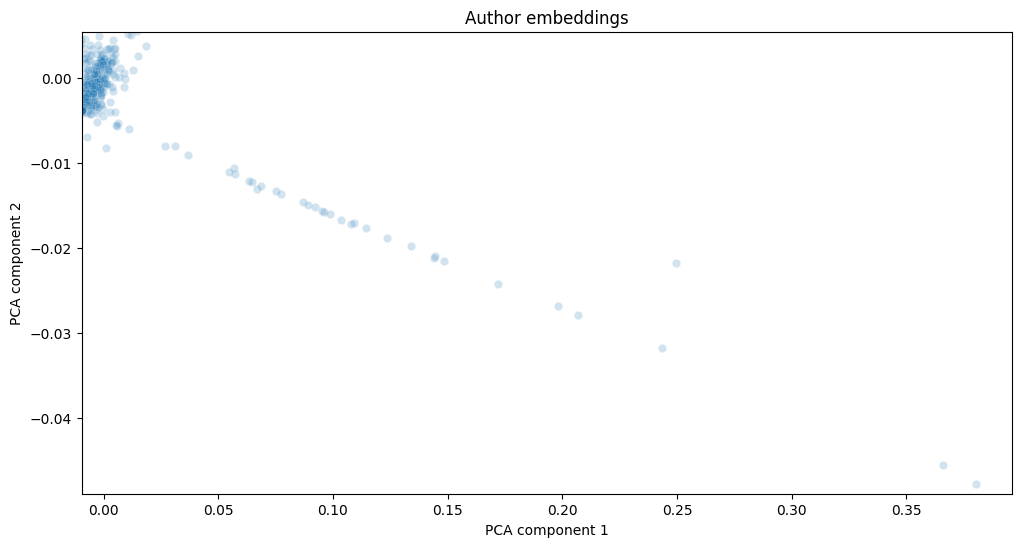

In [53]:
from sklearn.decomposition import PCA

pca_users = PCA(n_components=2)
user_embeddings = model.user_factors
user_embeddings_pca = pca_users.fit_transform(user_embeddings)

pca_authors = PCA(n_components=2)
author_embeddings = model.item_factors
author_embeddings_pca = pca_authors.fit_transform(author_embeddings)

uid_to_age_class = als_data.groupby('uid')['age_class'].first().to_dict()
uid_to_sex = als_data.groupby('uid')['sex'].first().to_dict()

def plot_embeddings(pca_embeddings, title, hue=None):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=pca_embeddings[:, 0],
                    y=pca_embeddings[:, 1],
                    hue=hue,
                    palette='tab10', alpha=0.2)
    plt.xlabel('PCA component 1')
    plt.ylabel('PCA component 2')
    plt.title(title)
    plt.xlim(np.quantile(pca_embeddings[:, 0], 0.01), np.quantile(pca_embeddings[:, 0], 0.99))
    plt.ylim(np.quantile(pca_embeddings[:, 1], 0.01), np.quantile(pca_embeddings[:, 1], 0.99))
    plt.show()

plot_embeddings(user_embeddings_pca, 'User embeddings', hue=[uid_to_sex[i] for i in range(user_embeddings.shape[0])])
plot_embeddings(author_embeddings_pca, 'Author embeddings')

In [58]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, classification_report

knn_data = als_data[als_data.sex.notnull()].query(f'uid < {user_embeddings.shape[0]}')

all_users = knn_data['uid'].unique().tolist()
train_users = np.random.choice(all_users, int(0.8 * len(all_users)), replace=False)
test_users = list(set(all_users) - set(train_users))

X_train = user_embeddings[train_users]
X_test = user_embeddings[test_users]
y_train = knn_data.groupby('uid')['sex'].first().loc[train_users].values.astype(int)
y_test = knn_data.groupby('uid')['sex'].first().loc[test_users].values.astype(int)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((139212, 64), (34803, 64), (139212,), (34803,))

In [62]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69     17256
           1       0.69      0.71      0.70     17547

    accuracy                           0.70     34803
   macro avg       0.70      0.70      0.70     34803
weighted avg       0.70      0.70      0.70     34803



100%|██████████| 24/24 [00:46<00:00,  1.93s/it]


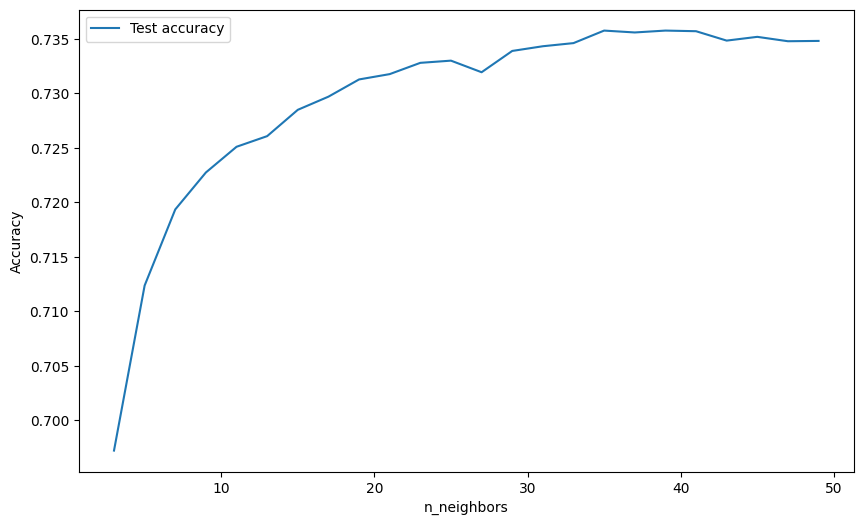

In [67]:
n_neighbors = np.arange(3, 50, 2)
test_accuracy = np.zeros(len(n_neighbors))
for i, k in tqdm(enumerate(n_neighbors), total=len(n_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    test_accuracy[i] = accuracy_score(y_test, y_pred)
    
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, test_accuracy, label='Test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [74]:
user_embeddings_df = pd.DataFrame(user_embeddings, columns=[f'als_emb_{i}' for i in range(user_embeddings.shape[1])])
user_embeddings_df['uid'] = range(user_embeddings.shape[0])
user_embeddings_df.merge(als_data[['uid', 'viewer_uid']].drop_duplicates(), on='uid').drop('uid', axis=1).to_parquet(
    './data/user_embeddings.parquet', index=False
)